# Etude de la variable PPA

### Le cas d'une personne seule sans enfant

In [24]:
from datetime import date
import matplotlib.pyplot as plt
#importer numpy permet de coler deux sections de courbes (nécessaire quand on fait varier le salaire de base en-dessous du SMIC mensuel)
import numpy as np
from numpy import logical_not as not_, minimum as min_, maximum as max_, logical_and as and_, logical_or as or_, round as round_

%matplotlib inline

import json
import openfisca_france
from openfisca_france.model.base import *

# to debug / trace
from openfisca_core import tools
from openfisca_core.reforms import Reform

import csv # module nécessaire pour l'enregistrement des données dans un fichier utilisable sous Excel

# TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = openfisca_france.FranceTaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 


In [25]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2016,
    parent1 = dict(
        ),
    menage = dict(
            loyer = 1000 * 3,
           # statut_occupation = 4,
            ),
).new_simulation(debug = True)

In [26]:
individu_sans_enfant_ppa = simulation.calculate_add('ppa')/12
individu_sans_enfant_ppa

array([   0.        ,   88.20098877,  176.38648987,  264.59735107,
        238.97563171,  212.298172  ,  168.69374084,  114.632164  ,
         60.58298874,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ], dtype=float32)

In [27]:
cice = simulation.calculate_add('credit_impot_competitivite_emploi')
cice/12

array([   0.        ,   13.157897  ,   26.31579399,   39.47368622,
         52.63158798,   65.78948212,   78.94737244,   92.10527802,
        105.26317596,  118.42102814,  131.57896423,  144.73683167,
        157.89474487,  171.05262756,  184.21055603,  197.36842346,
        210.52635193,    0.        ,    0.        ,    0.        ], dtype=float32)

In [28]:
c = csv.writer(open("CICE", "wb"))
c.writerow(["CICE", round(cice[0]/12,0)])

In [29]:
individu_sans_enfant_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
individu_sans_enfant_salaire_de_base

array([    0.        ,   219.29823303,   438.59646606,   657.89471436,
         877.19293213,  1096.49121094,  1315.78942871,  1535.08776855,
        1754.38586426,  1973.6842041 ,  2192.98242188,  2412.28076172,
        2631.57885742,  2850.87719727,  3070.17553711,  3289.47363281,
        3508.77172852,  3728.0703125 ,  3947.3684082 ,  4166.66650391], dtype=float32)

### Le cas d'une personne seule avec 1 enfant

In [30]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2016,
    parent1 = dict(
        ),
    enfants = [
        dict(date_naissance = date(2006, 1, 1)),
     ],
).new_simulation(debug = True)

In [31]:
individu_1_enfant_ppa = simulation.calculate_add('ppa')/12
individu_1_enfant_ppa

array([   0.        ,   88.20098877,  176.38648987,  264.59738159,
        370.79019165,  354.6595459 ,  311.0552063 ,  256.99353027,
        202.94439697,  148.88261414,   94.8303833 ,   40.77185059,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ], dtype=float32)

In [32]:
individu_1_enfant_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
individu_1_enfant_salaire_de_base

array([    0.        ,     0.        ,   219.29823303,     0.        ,
         438.59646606,     0.        ,   657.89471436,     0.        ,
         877.19293213,     0.        ,  1096.49121094,     0.        ,
        1315.78942871,     0.        ,  1535.08776855,     0.        ,
        1754.38586426,     0.        ,  1973.6842041 ,     0.        ,
        2192.98242188,     0.        ,  2412.28076172,     0.        ,
        2631.57885742,     0.        ,  2850.87719727,     0.        ,
        3070.17553711,     0.        ,  3289.47363281,     0.        ,
        3508.77172852,     0.        ,  3728.0703125 ,     0.        ,
        3947.3684082 ,     0.        ,  4166.66650391,     0.        ], dtype=float32)

In [33]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (ppa et salaire de base)
i_1_enfant_salaire_de_base = []
i = 0
while (i < len(individu_1_enfant_salaire_de_base)):
    somme = 0
    valeur_1 = individu_1_enfant_salaire_de_base[i]
    i = i + 1
    valeur_2 = individu_1_enfant_salaire_de_base[i]
    somme = valeur_1 + valeur_2
    i_1_enfant_salaire_de_base.append(somme)
    i = i + 1
    
i_1_enfant_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'une personne seule avec 2 enfants

In [34]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2016,
    parent1 = dict(
        ),
    enfants = [
        dict(date_naissance = date(2006, 1, 1)),
        dict(date_naissance = date(2011, 1, 1)),
     ],
).new_simulation(debug = True)

In [35]:
individu_2_enfants_ppa = simulation.calculate_add('ppa')/12
individu_2_enfants_ppa

array([   0.        ,   88.20096588,  176.38648987,  264.59735107,
        327.8380127 ,  301.16043091,  257.55612183,  203.49455261,
        149.44537354,   95.38348389,   41.33125687,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ], dtype=float32)

In [36]:
individu_2_enfants_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
individu_2_enfants_salaire_de_base

array([    0.        ,     0.        ,     0.        ,   219.29823303,
           0.        ,     0.        ,   438.59646606,     0.        ,
           0.        ,   657.89471436,     0.        ,     0.        ,
         877.19293213,     0.        ,     0.        ,  1096.49121094,
           0.        ,     0.        ,  1315.78942871,     0.        ,
           0.        ,  1535.08776855,     0.        ,     0.        ,
        1754.38586426,     0.        ,     0.        ,  1973.6842041 ,
           0.        ,     0.        ,  2192.98242188,     0.        ,
           0.        ,  2412.28076172,     0.        ,     0.        ,
        2631.57885742,     0.        ,     0.        ,  2850.87719727,
           0.        ,     0.        ,  3070.17553711,     0.        ,
           0.        ,  3289.47363281,     0.        ,     0.        ,
        3508.77172852,     0.        ,     0.        ,  3728.0703125 ,
           0.        ,     0.        ,  3947.3684082 ,     0.        ,
      

In [37]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (ppa et salaire de base)
i_2_enfants_salaire_de_base = []
i = 0
while (i < len(individu_2_enfants_salaire_de_base)):
    somme = 0
    valeur_1 = individu_2_enfants_salaire_de_base[i]
    i = i + 1
    valeur_2 = individu_2_enfants_salaire_de_base[i]
    i = i + 1
    valeur_3 = individu_2_enfants_salaire_de_base[i]   
    somme = valeur_1 + valeur_2 + valeur_3
    i_2_enfants_salaire_de_base.append(somme)
    i = i + 1
    
i_2_enfants_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'une personne seule avec 3 enfants

In [38]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2016,
    parent1 = dict(
        ),
    enfants = [
        dict(date_naissance = date(2008, 1, 1)),
        dict(date_naissance = date(2004, 1, 1)),
        dict(date_naissance = date(2000, 1, 1)),
     ],
).new_simulation(debug = True)

In [39]:
individu_3_enfants_ppa = simulation.calculate_add('ppa')/12
individu_3_enfants_ppa

array([   0.        ,   88.20098877,  176.38641357,  182.49462891,
        146.45275879,  119.7753067 ,   76.17087555,   21.38232613,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ], dtype=float32)

In [40]:
individu_3_enfants_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
individu_3_enfants_salaire_de_base

array([    0.        ,     0.        ,     0.        ,     0.        ,
         219.29823303,     0.        ,     0.        ,     0.        ,
         438.59646606,     0.        ,     0.        ,     0.        ,
         657.89471436,     0.        ,     0.        ,     0.        ,
         877.19293213,     0.        ,     0.        ,     0.        ,
        1096.49121094,     0.        ,     0.        ,     0.        ,
        1315.78942871,     0.        ,     0.        ,     0.        ,
        1535.08776855,     0.        ,     0.        ,     0.        ,
        1754.38586426,     0.        ,     0.        ,     0.        ,
        1973.6842041 ,     0.        ,     0.        ,     0.        ,
        2192.98242188,     0.        ,     0.        ,     0.        ,
        2412.28076172,     0.        ,     0.        ,     0.        ,
        2631.57885742,     0.        ,     0.        ,     0.        ,
        2850.87719727,     0.        ,     0.        ,     0.        ,
      

In [41]:
# Cette manipulation est nécessaire pour égaliser la longueur des 2 tableaux (ppa et salaire de base)
i_3_enfants_salaire_de_base = []
i = 0
while (i < len(individu_3_enfants_salaire_de_base)):
    somme = 0
    valeur_1 = individu_3_enfants_salaire_de_base[i]
    i = i + 1
    valeur_2 = individu_3_enfants_salaire_de_base[i]
    i = i + 1
    valeur_3 = individu_3_enfants_salaire_de_base[i]   
    i = i + 1
    valeur_4 = individu_3_enfants_salaire_de_base[i] 
    somme = valeur_1 + valeur_2 + valeur_3 + valeur_4
    i_3_enfants_salaire_de_base.append(somme)
    i = i + 1
    
i_3_enfants_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'un couple sans enfant

In [42]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2016,
    parent1 = dict(
        ),
    parent2 = dict(
        ),    
).new_simulation(debug = True)

In [43]:
couple_sans_enfant_ppa = simulation.calculate_add('ppa')/12
couple_sans_enfant_ppa

array([   0.        ,   88.20098877,  176.38648987,  264.59738159,
        370.79019165,  430.89318848,  387.28884888,  333.22717285,
        279.177948  ,  225.11616516,  171.06394958,  117.00540924,
         62.95318604,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ], dtype=float32)

In [44]:
couple_sans_enfant_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
couple_sans_enfant_salaire_de_base

array([    0.        ,     0.        ,   219.29823303,     0.        ,
         438.59646606,     0.        ,   657.89471436,     0.        ,
         877.19293213,     0.        ,  1096.49121094,     0.        ,
        1315.78942871,     0.        ,  1535.08776855,     0.        ,
        1754.38586426,     0.        ,  1973.6842041 ,     0.        ,
        2192.98242188,     0.        ,  2412.28076172,     0.        ,
        2631.57885742,     0.        ,  2850.87719727,     0.        ,
        3070.17553711,     0.        ,  3289.47363281,     0.        ,
        3508.77172852,     0.        ,  3728.0703125 ,     0.        ,
        3947.3684082 ,     0.        ,  4166.66650391,     0.        ], dtype=float32)

In [45]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (ppa et salaire de base)
c_sans_enfant_salaire_de_base = []
i = 0
while (i < len(couple_sans_enfant_salaire_de_base)):
    somme = 0
    valeur_1 = couple_sans_enfant_salaire_de_base[i]
    i = i + 1
    valeur_2 = couple_sans_enfant_salaire_de_base[i]
    somme = valeur_1 + valeur_2
    c_sans_enfant_salaire_de_base.append(somme)
    i = i + 1
    
c_sans_enfant_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'un couple avec 1 enfant

In [46]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2016,
    parent1 = dict(
        ),
    parent2 = dict(
        ),  
    enfants = [
        dict(date_naissance = date(2006, 1, 1)),
        ],
).new_simulation(debug = True)

In [47]:
couple_1_enfant_ppa = simulation.calculate_add('ppa')/12
couple_1_enfant_ppa

array([   0.        ,   88.20098877,  176.38648987,  264.59735107,
        370.79025269,  486.36398315,  518.44573975,  464.38412476,
        410.33499146,  356.27310181,  302.22091675,  248.16247559,
        194.11022949,  140.05444336,   85.99906158,   30.44344902,
          0.        ,    0.        ,    0.        ,    0.        ], dtype=float32)

In [48]:
couple_1_enfant_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
couple_1_enfant_salaire_de_base

array([    0.        ,     0.        ,     0.        ,   219.29823303,
           0.        ,     0.        ,   438.59646606,     0.        ,
           0.        ,   657.89471436,     0.        ,     0.        ,
         877.19293213,     0.        ,     0.        ,  1096.49121094,
           0.        ,     0.        ,  1315.78942871,     0.        ,
           0.        ,  1535.08776855,     0.        ,     0.        ,
        1754.38586426,     0.        ,     0.        ,  1973.6842041 ,
           0.        ,     0.        ,  2192.98242188,     0.        ,
           0.        ,  2412.28076172,     0.        ,     0.        ,
        2631.57885742,     0.        ,     0.        ,  2850.87719727,
           0.        ,     0.        ,  3070.17553711,     0.        ,
           0.        ,  3289.47363281,     0.        ,     0.        ,
        3508.77172852,     0.        ,     0.        ,  3728.0703125 ,
           0.        ,     0.        ,  3947.3684082 ,     0.        ,
      

In [49]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (ppa et salaire de base)
c_1_enfant_salaire_de_base = []
i = 0
while (i < len(couple_1_enfant_salaire_de_base)):
    somme = 0
    valeur_1 = couple_1_enfant_salaire_de_base[i]
    i = i + 1
    valeur_2 = couple_1_enfant_salaire_de_base[i]
    i = i + 1
    valeur_3 = couple_1_enfant_salaire_de_base[i]   
    somme = valeur_1 + valeur_2 + valeur_3
    c_1_enfant_salaire_de_base.append(somme)
    i = i + 1
    
c_1_enfant_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'un couple avec 2 enfants

In [50]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2016,
    parent1 = dict(
        ),
    parent2 = dict(
        ),  
    enfants = [
        dict(date_naissance = date(2006, 1, 1)),
        dict(date_naissance = date(2011, 1, 1)),
        ],
).new_simulation(debug = True)    

In [51]:
couple_2_enfants_ppa = simulation.calculate_add('ppa')/12
couple_2_enfants_ppa

array([   0.        ,   88.20098877,  176.38641357,  264.59738159,
        370.79019165,  486.36398315,  541.18023682,  487.1187439 ,
        433.0696106 ,  379.00759888,  324.95544434,  270.89682007,
        216.84484863,  162.78907776,  108.73352051,   54.20556641,
          0.        ,    0.        ,    0.        ,    0.        ], dtype=float32)

In [52]:
couple_2_enfants_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
couple_2_enfants_salaire_de_base

array([    0.        ,     0.        ,     0.        ,     0.        ,
         219.29823303,     0.        ,     0.        ,     0.        ,
         438.59646606,     0.        ,     0.        ,     0.        ,
         657.89471436,     0.        ,     0.        ,     0.        ,
         877.19293213,     0.        ,     0.        ,     0.        ,
        1096.49121094,     0.        ,     0.        ,     0.        ,
        1315.78942871,     0.        ,     0.        ,     0.        ,
        1535.08776855,     0.        ,     0.        ,     0.        ,
        1754.38586426,     0.        ,     0.        ,     0.        ,
        1973.6842041 ,     0.        ,     0.        ,     0.        ,
        2192.98242188,     0.        ,     0.        ,     0.        ,
        2412.28076172,     0.        ,     0.        ,     0.        ,
        2631.57885742,     0.        ,     0.        ,     0.        ,
        2850.87719727,     0.        ,     0.        ,     0.        ,
      

In [53]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (ppa et salaire de base)
c_2_enfants_salaire_de_base = []
i = 0
while (i < len(couple_2_enfants_salaire_de_base)):
    somme = 0
    valeur_1 = couple_2_enfants_salaire_de_base[i]
    i = i + 1
    valeur_2 = couple_2_enfants_salaire_de_base[i]
    i = i + 1
    valeur_3 = couple_2_enfants_salaire_de_base[i]   
    i = i + 1
    valeur_4 = couple_2_enfants_salaire_de_base[i] 
    somme = valeur_1 + valeur_2 + valeur_3 + valeur_4
    c_2_enfants_salaire_de_base.append(somme)
    i = i + 1
    
c_2_enfants_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

### Le cas d'un couple avec 3 enfants

In [54]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 20,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2016,
    parent1 = dict(
        ),
    parent2 = dict(
        ),  
    enfants = [
        dict(date_naissance = date(2008, 1, 1)),
        dict(date_naissance = date(2004, 1, 1)),
        dict(date_naissance = date(2000, 1, 1)),
        ],
).new_simulation(debug = True)    

In [55]:
couple_3_enfants_ppa = simulation.calculate_add('ppa')/12
couple_3_enfants_ppa

array([   0.        ,   88.20098877,  176.38641357,  264.59738159,
        370.79019165,  479.63290405,  436.02871704,  381.96704102,
        327.91775513,  273.85604858,  219.80393982,  165.74531555,
        111.69297028,   57.63720703,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ], dtype=float32)

In [56]:
couple_3_enfants_salaire_de_base = simulation.calculate_add('salaire_de_base')/12
couple_3_enfants_salaire_de_base

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,   219.29823303,     0.        ,     0.        ,
           0.        ,     0.        ,   438.59646606,     0.        ,
           0.        ,     0.        ,     0.        ,   657.89471436,
           0.        ,     0.        ,     0.        ,     0.        ,
         877.19293213,     0.        ,     0.        ,     0.        ,
           0.        ,  1096.49121094,     0.        ,     0.        ,
           0.        ,     0.        ,  1315.78942871,     0.        ,
           0.        ,     0.        ,     0.        ,  1535.08776855,
           0.        ,     0.        ,     0.        ,     0.        ,
        1754.38586426,     0.        ,     0.        ,     0.        ,
           0.        ,  1973.6842041 ,     0.        ,     0.        ,
           0.        ,     0.        ,  2192.98242188,     0.        ,
           0.        ,     0.        ,     0.        ,  2412.28076172,
      

In [57]:
# Cette manipulation permet d'égaliser la longueur des 2 tableaux (ppa et salaire de base)
c_3_enfants_salaire_de_base = []
i = 0
while (i < len(couple_3_enfants_salaire_de_base)):
    somme = 0
    valeur_1 = couple_3_enfants_salaire_de_base[i]
    i = i + 1
    valeur_2 = couple_3_enfants_salaire_de_base[i]
    i = i + 1
    valeur_3 = couple_3_enfants_salaire_de_base[i]   
    i = i + 1
    valeur_4 = couple_3_enfants_salaire_de_base[i] 
    i = i + 1
    valeur_5 = couple_3_enfants_salaire_de_base[i]    
    somme = valeur_1 + valeur_2 + valeur_3 + valeur_4 + valeur_5
    c_3_enfants_salaire_de_base.append(somme)
    i = i + 1
    
c_3_enfants_salaire_de_base

[0.0,
 219.29823,
 438.59647,
 657.89471,
 877.19293,
 1096.4912,
 1315.7894,
 1535.0878,
 1754.3859,
 1973.6842,
 2192.9824,
 2412.2808,
 2631.5789,
 2850.8772,
 3070.1755,
 3289.4736,
 3508.7717,
 3728.0703,
 3947.3684,
 4166.6665]

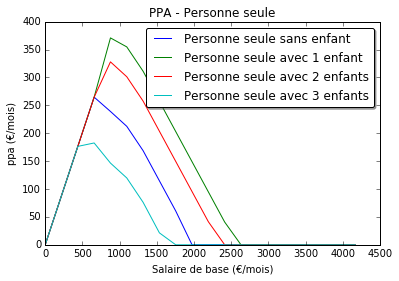

In [58]:
# fig = plt.figure()

plt.plot(individu_sans_enfant_salaire_de_base, individu_sans_enfant_ppa, label="Personne seule sans enfant")
plt.plot(i_1_enfant_salaire_de_base, individu_1_enfant_ppa, label="Personne seule avec 1 enfant")
plt.plot(i_2_enfants_salaire_de_base, individu_2_enfants_ppa, label="Personne seule avec 2 enfants")
plt.plot(i_3_enfants_salaire_de_base, individu_3_enfants_ppa, label="Personne seule avec 3 enfants")
plt.xlabel(u'Salaire de base (€/mois)')
plt.ylabel(u'ppa (€/mois)')
plt.title(u'PPA - Personne seule')
plt.legend(loc = 0, shadow=True, fancybox=True)

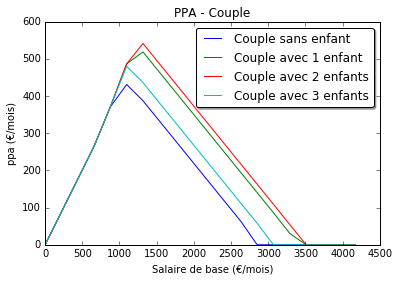

In [59]:
# fig = plt.figure()

plt.plot(c_sans_enfant_salaire_de_base, couple_sans_enfant_ppa, label="Couple sans enfant")
plt.plot(c_1_enfant_salaire_de_base, couple_1_enfant_ppa, label="Couple avec 1 enfant")
plt.plot(c_2_enfants_salaire_de_base, couple_2_enfants_ppa, label="Couple avec 2 enfants")
plt.plot(c_3_enfants_salaire_de_base, couple_3_enfants_ppa, label="Couple avec 3 enfants")
plt.xlabel(u'Salaire de base (€/mois)')
plt.ylabel(u'ppa (€/mois)')
plt.title(u'PPA - Couple')
plt.legend(loc = 0, shadow=True, fancybox=True)